In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv("./Data/for_classification.csv")

In [25]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=0)
y_train = X_train['cluster_id']
X_train = X_train.drop(['cluster_id'],axis=1)
y_test = X_test['cluster_id']
X_test = X_test.drop(['cluster_id'],axis =1)

In [26]:
### grid search code

In [27]:
forest = RandomForestClassifier(n_estimators=600,max_depth = 12, random_state=42,criterion = 'entropy',max_features='auto')
forest.fit(X_train,y_train)
pred = forest.predict(X_test)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
print("accuracy : ",accuracy_score(y_test,pred))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986
accuracy :  0.9864764923402007


In [28]:
estimator = forest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'cluster_id',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

print("graph saved!!")

graph saved!!


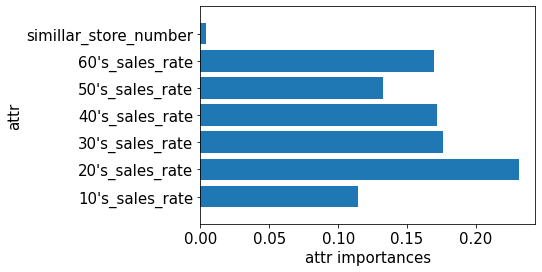

In [29]:
def plot_feature_importances_cancer(model):

    n_features = X_train.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), X_train.columns)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)
plt.rcParams.update({'font.size': 15})
plt.show()
plot_feature_importances_cancer(forest)

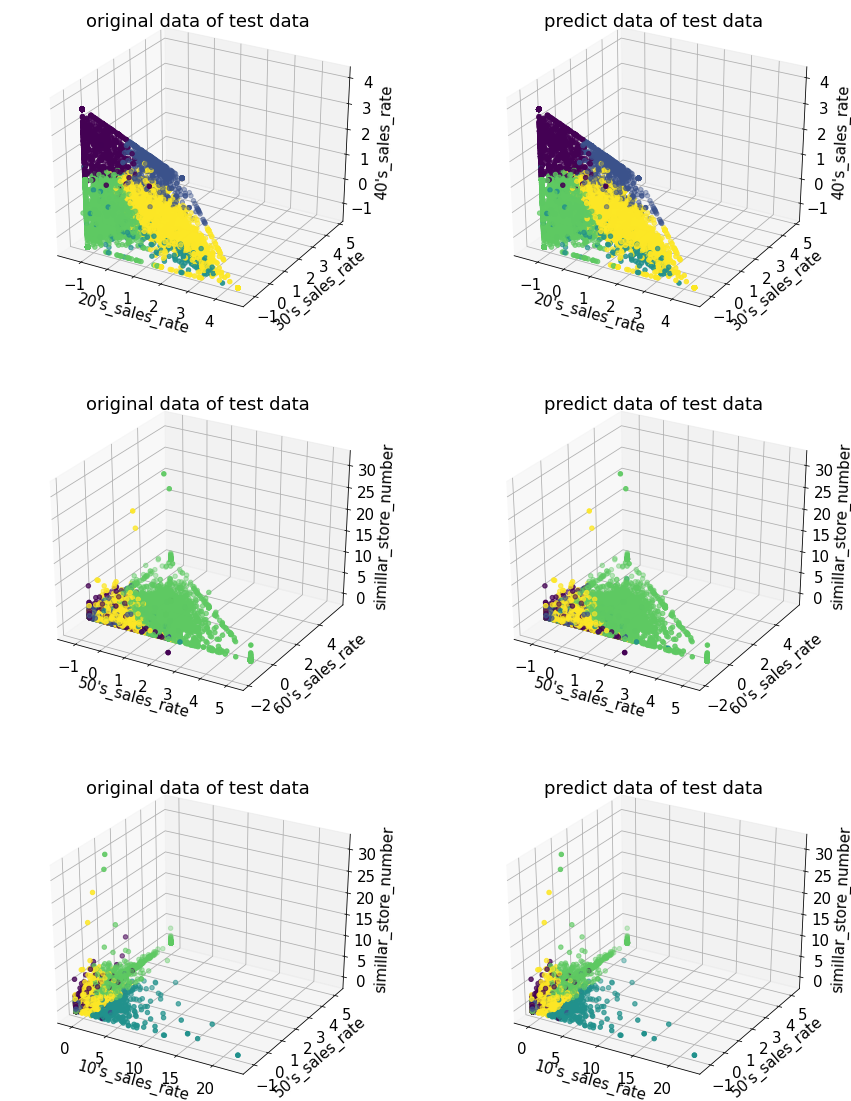

In [30]:
from mpl_toolkits.mplot3d import Axes3D
origin = X_test.copy()
origin['cluster_id'] = y_test
fig = plt.figure(figsize = (15,20))
###############################
ax = fig.add_subplot(321,projection = '3d')
ax.scatter(origin["20's_sales_rate"],
           origin["30's_sales_rate"],
           origin["40's_sales_rate"],c = origin['cluster_id'])
ax.set_xlabel("20's_sales_rate")
ax.set_ylabel("30's_sales_rate")
ax.set_zlabel("40's_sales_rate")
plt.title("original data of test data")

test = X_test.copy()
test['cluster_id'] = pred
ax = fig.add_subplot(322,projection = '3d')
ax.scatter(test["20's_sales_rate"],
           test["30's_sales_rate"],
           test["40's_sales_rate"],c = test['cluster_id'])
ax.set_xlabel("20's_sales_rate")
ax.set_ylabel("30's_sales_rate")
ax.set_zlabel("40's_sales_rate")
plt.title("predict data of test data")
##############################
ax = fig.add_subplot(323,projection = '3d')
ax.scatter(origin["50's_sales_rate"],
           origin["60's_sales_rate"],
           origin["simillar_store_number"],c = origin['cluster_id'])
ax.set_xlabel("50's_sales_rate")
ax.set_ylabel("60's_sales_rate")
ax.set_zlabel("simillar_store_number")
plt.title("original data of test data")

ax = fig.add_subplot(324,projection = '3d')
ax.scatter(test["50's_sales_rate"],
           test["60's_sales_rate"],
           test["simillar_store_number"],c = test['cluster_id'])
ax.set_xlabel("50's_sales_rate")
ax.set_ylabel("60's_sales_rate")
ax.set_zlabel("simillar_store_number")
plt.title("predict data of test data")
##############################
ax = fig.add_subplot(325,projection = '3d')
ax.scatter(origin["10's_sales_rate"],
           origin["50's_sales_rate"],
           origin["simillar_store_number"],c = origin['cluster_id'])
ax.set_xlabel("10's_sales_rate")
ax.set_ylabel("50's_sales_rate")
ax.set_zlabel("simillar_store_number")
plt.title("original data of test data")

ax = fig.add_subplot(326,projection = '3d')
ax.scatter(test["10's_sales_rate"],
           test["50's_sales_rate"],
           test["simillar_store_number"],c = test['cluster_id'])
ax.set_xlabel("10's_sales_rate")
ax.set_ylabel("50's_sales_rate")
ax.set_zlabel("simillar_store_number")
plt.title("predict data of test data")

plt.show()

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.98       800
     class 1       0.99      0.98      0.99       715
     class 2       0.99      0.97      0.98       331
     class 3       0.99      0.98      0.99      3452
     class 4       0.98      0.99      0.99      4167

    accuracy                           0.99      9465
   macro avg       0.99      0.98      0.98      9465
weighted avg       0.99      0.99      0.99      9465



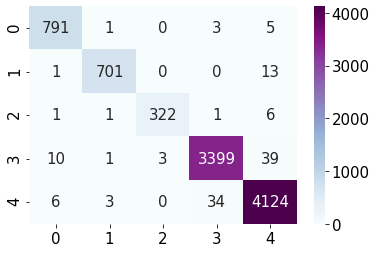

In [31]:
import seaborn as sns
array = confusion_matrix(origin['cluster_id'], test['cluster_id'])
labels = ['0','1','2','3','4']
labels = np.asarray(labels)
sns.heatmap(array, annot=True, fmt='',cmap = 'BuPu')
from sklearn.metrics import classification_report
result = classification_report(origin['cluster_id'], test['cluster_id'], target_names=['class 0', 'class 1','class 2','class 3','class 4'])
print(result)